#### import and show data

In [347]:
import pandas as pd

def importFile(file):
    data = pd.read_csv('C:\\KinectData\\converted\\' + file)

    x = data.drop('label', axis=1)
    y = pd.factorize(data['label'].values)[0]

    print(data.shape)
    data.head()
    
    return data,x,y

In [348]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def showPlot(dataset):
    dataset[dataset.columns[-1]] = pd.factorize(dataset.values[:,-1])[0]
    data_f = dataset[dataset[dataset.columns[-1]] == 0]
    data_n = dataset[dataset[dataset.columns[-1]] == 1]
    cs = data_f.columns
    n = len(data_f.columns)-1

    if n == 2:
        plt.scatter(data_f[cs[0]],data_f[cs[1]],c='r')
        plt.scatter(data_n[cs[0]],data_n[cs[1]],c='b')
    elif n == 3:
        ax = plt.figure().add_subplot(111, projection='3d')

        ax.scatter(data_f[cs[0]],data_f[cs[1]],data_f[cs[2]],c='r')
        ax.scatter(data_n[cs[0]],data_n[cs[1]],data_n[cs[2]],c='b')
    else:
        print('<2 or >3 dimensions')
    plt.show()

In [349]:
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
import numpy as np

def validateClfAndDraw(clf):
    clf.fit(x,y)
    scores = cross_val_score(clf, x, y, cv=7, scoring='accuracy')
    
    print('k folds accuracies: ',scores)
    print('mean: ',scores.mean())
    if x.shape[1] == 2:
        plot_decision_regions(X=x.values, 
                              y=y,
                              clf=clf,
                              legend=2)

### models

In [350]:
data,x,y = importFile('top_features_rus-eng_far.csv')

(28, 3)


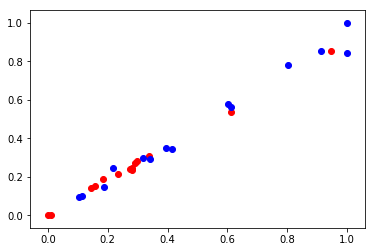

In [351]:
showPlot(data)

#### knn

k folds accuracies:  [0.75 0.25 0.5  0.5  1.   0.75 0.75]
mean:  0.6428571428571429


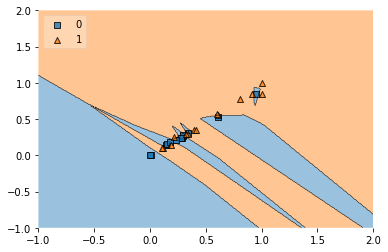

In [371]:
from sklearn.neighbors import KNeighborsClassifier

knn = GridSearchCV(KNeighborsClassifier(), {
          'n_neighbors': np.arange(1,15),
          'weights': ['distance','uniform']
      }).fit(x,y).best_estimator_
validateClfAndDraw(knn)

#### svm

k folds accuracies:  [0.75 1.   0.5  0.5  0.5  0.75 0.5 ]
mean:  0.6428571428571429


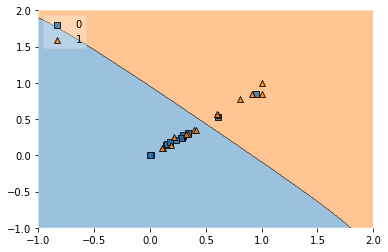

In [375]:
from sklearn import svm

validateClfAndDraw(svm.SVC())

#### k-means

k folds accuracies:  [0.75 0.75 0.   1.   0.5  0.75 0.75]
mean:  0.6428571428571429


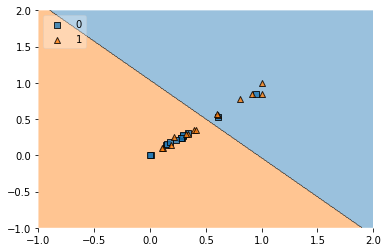

In [383]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=500)
validateClfAndDraw(kmeans)

#### decision tree

k folds accuracies:  [0.75 0.5  0.5  0.75 1.   0.75 0.75]
mean:  0.7142857142857143


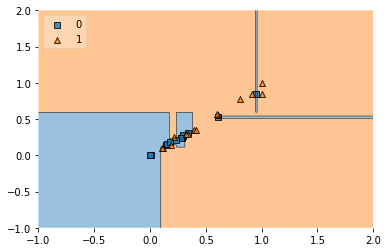

In [392]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

dtree = GridSearchCV(DecisionTreeClassifier(), {
            'splitter': ['best','random'],
            'criterion': ['gini','entropy']
        }).fit(x,y).best_estimator_
validateClfAndDraw(dtree)

with open("C:\\KinectData\\dtree.txt", "w") as f:
    f = tree.export_graphviz(dtree, out_file=f)

#### random forest

k folds accuracies:  [0.75 0.5  0.5  0.75 1.   0.75 0.75]
mean:  0.7142857142857143


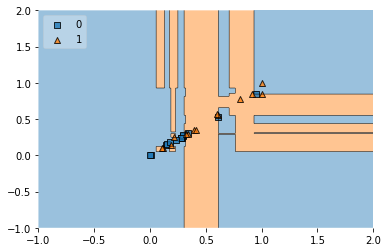

In [394]:
from sklearn.ensemble import RandomForestClassifier

forest = GridSearchCV(RandomForestClassifier(), {
             'n_estimators': np.arange(5,15),
             'criterion': ['gini','entropy'], 
             'bootstrap': [True, False], 
             'class_weight': ['balanced', 'balanced_subsample']
         }).fit(x,y).best_estimator_
validateClfAndDraw(forest)

#### boosting

In [358]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

k folds accuracies:  [0.75 0.75 0.5  0.75 1.   0.75 0.75]
mean:  0.75


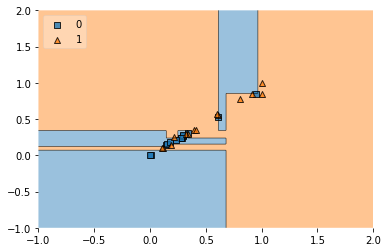

In [429]:
boost = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=dtree,
          learning_rate=1.0, n_estimators=70, random_state=None)
validateClfAndDraw(boost)

k folds accuracies:  [0.75 0.25 0.5  0.5  1.   0.5  0.75]
mean:  0.6071428571428571


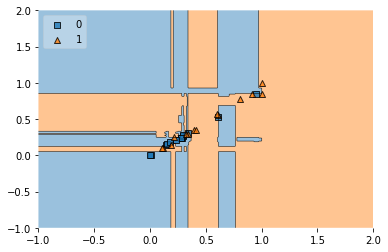

In [398]:
boost = GradientBoostingClassifier(criterion='mae', learning_rate=0.8, loss='deviance', n_estimators=60, subsample=0.6)
validateClfAndDraw(boost)